# Preprocessing

## Import des données

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/projects/fraudulent_activity/Fraud_Data.csv")
ip_country = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/projects/fraudulent_activity/IpAddress_to_Country.csv")

In [3]:
def transform_ip(arg) :
    try :
        return ip_country.country[(ip_country.lower_bound_ip_address < arg) & (ip_country.upper_bound_ip_address > arg)].iloc[0]
    except IndexError :
        return "Pays inconnu"  
      

df1["country_name"] = df1.ip_address.apply(transform_ip)

In [4]:
df1.shape

(151112, 12)

In [5]:
df1.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


In [6]:
df1 = df1.iloc[:, 1:]
df1.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,country_name
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States


## Date/Time

In [7]:
df1.signup_time = pd.to_datetime(df1.signup_time, format ="%Y-%m-%d %H:%M:%S")
df1.purchase_time = pd.to_datetime(df1.purchase_time, format ="%Y-%m-%d %H:%M:%S")
df1["time_delta"] = (df1.purchase_time - df1.signup_time)/np.timedelta64(1, 's')

In [8]:
df1.columns

Index(['signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source',
       'browser', 'sex', 'age', 'ip_address', 'class', 'country_name',
       'time_delta'],
      dtype='object')

In [9]:
df1 = df1.rename(columns={"class": "y", "x": "country_name"})
df1.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,y,country_name,time_delta
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu,492085.0
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0


In [10]:
df1['year'] = pd.DatetimeIndex(df1['purchase_time']).year
df1['month'] = pd.DatetimeIndex(df1['purchase_time']).month

df1.head()

,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,y,country_name,time_delta,year,month
0,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,Japan,4506682.0,2015,4
1,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,United States,17944.0,2015,6
2,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,United States,1.0,2015,1
3,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,Pays inconnu,492085.0,2015,5
4,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,United States,4361461.0,2015,9


# Data Viz

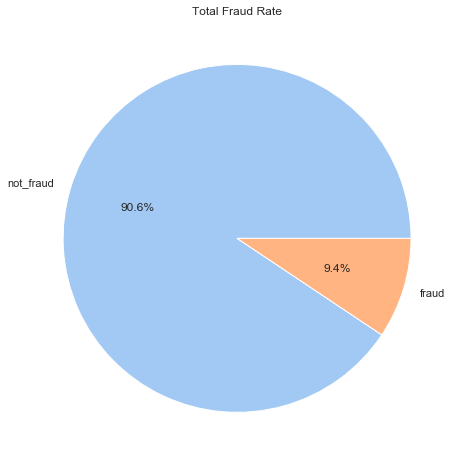

In [11]:
sns.set(style="ticks", palette="pastel")

### TOTAL FRAUD RATE ###
fig = plt.figure(figsize=(15,8))
not_fraud = df1[df1.y == 0].y.value_counts()
fraud = df1[df1.y == 1].y.value_counts()

labels = ['not_fraud','fraud']

fraud_pie = np.concatenate((not_fraud, fraud), axis=0)

plt.pie(fraud_pie, labels=labels, autopct='%1.1f%%')
plt.title("Total Fraud Rate")
plt.show()

In [12]:
fraud_country = df1[['country_name', 'y']].groupby(['country_name', 'y'], as_index = False).size().unstack().fillna(0)

#total_fraud_country= fraud_country.iloc[:,-1].sum()
fraud_country['total_purchases_per_country'] = fraud_country.iloc[:,:].sum(axis=1)

fraud_country['%_Fraud_Country'] = round(fraud_country.iloc[:, -2]/fraud_country.iloc[:,-1]*100,2)
fraud_country = fraud_country.sort_values('%_Fraud_Country', ascending=False) 
fraud_country.describe()

y,0,1,total_purchases_per_country,%_Fraud_Country
count,182.000000,182.000000,182.000000,182.000000
mean,752.532967,77.752747,830.285714,7.175220
std,4274.246191,444.884179,4718.564368,10.671057
min,0.000000,0.000000,1.000000,0.000000
25%,5.000000,0.000000,5.250000,0.000000
50%,23.500000,2.000000,25.000000,5.190000
75%,210.250000,28.000000,236.250000,9.777500
max,52498.000000,5551.000000,58049.000000,100.000000


In [13]:
#fraud_country.loc["Denmark",:]

In [14]:
print("Il y a {} pays pour lesquels des transactions ont été enregistrées.".format(len(fraud_country['total_purchases_per_country'])))
print("Il y a {} pays où il n'y a pas de fraudes.".format(fraud_country['%_Fraud_Country'][fraud_country['%_Fraud_Country'] == 0].count()))
#print("Le taux médian de fraudes par pays est de {} %.".format(round(fraud_country['%_Fraud_Country'].mean(),2)))

Il y a 182 pays pour lesquels des transactions ont été enregistrées.
Il y a 72 pays où il n'y a pas de fraudes.


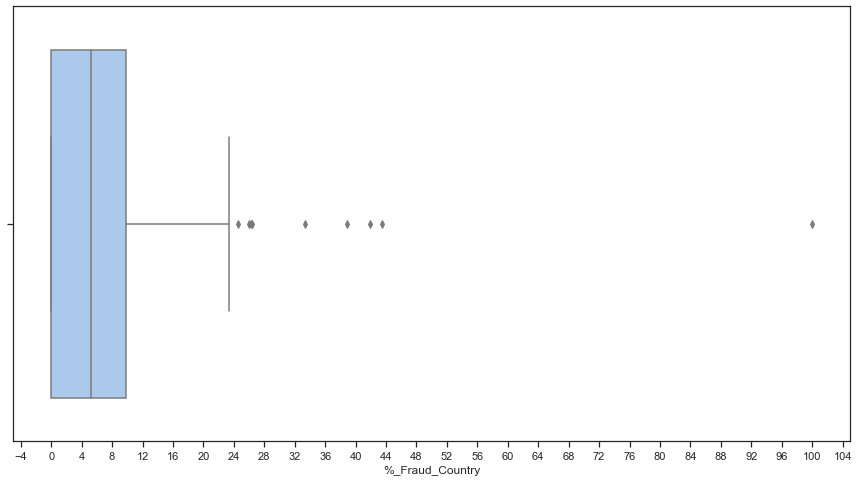

In [15]:
fig = plt.figure(figsize=(15,8))
fig = sns.boxplot(fraud_country['%_Fraud_Country'])
fig.xaxis.set_major_locator(plt.MaxNLocator(30))

In [16]:
median = np.median(fraud_country['%_Fraud_Country'])
upper_quartile = np.percentile(fraud_country['%_Fraud_Country'], 75)
lower_quartile = np.percentile(fraud_country['%_Fraud_Country'], 25)

iqr = upper_quartile - lower_quartile
upper_whisker = fraud_country['%_Fraud_Country'][fraud_country['%_Fraud_Country']<=upper_quartile+1.5*iqr].max()
lower_whisker = fraud_country['%_Fraud_Country'][fraud_country['%_Fraud_Country']>=lower_quartile-1.5*iqr].min()

print (lower_whisker, lower_quartile, round(median,2), round(upper_quartile,2), upper_whisker)

0.0 0.0 5.19 9.78 23.33


In [17]:
X2 = pd.DataFrame(fraud_country)
X2.reset_index('country_name')
X2['country'] = X2.index
X2['country_cat'] = fraud_country['%_Fraud_Country'].apply(lambda x: 0 if x == 0
                                                                     else 5 if x <= 5.19
                                                                     else 9 if x <= 9.77
                                                                     else 23 if x <= 23.33
                                                                     else 100)
X2.head()

y,0,1,total_purchases_per_country,%_Fraud_Country,country,country_cat
country_name,,,,,,
Turkmenistan,0.0,1.0,1.0,100.00,Turkmenistan,100
Namibia,13.0,10.0,23.0,43.48,Namibia,100
Sri Lanka,18.0,13.0,31.0,41.94,Sri Lanka,100
Luxembourg,44.0,28.0,72.0,38.89,Luxembourg,100
Virgin Islands (U.S.),2.0,1.0,3.0,33.33,Virgin Islands (U.S.),100


In [18]:
df1 = df1.rename(columns={"country_name": "country"})

In [19]:
X3 = pd.merge(df1, X2, on="country")

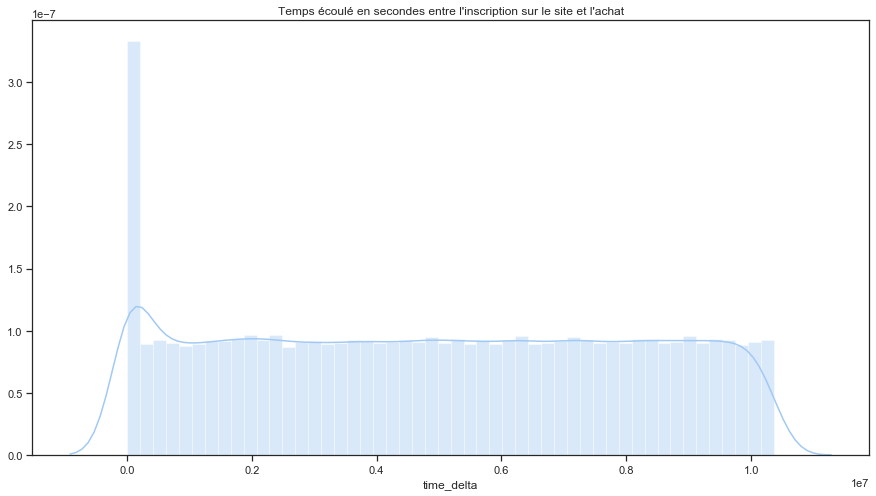

In [20]:
plt.figure(figsize=(15,8))
sns.distplot(X3['time_delta'])
plt.title("Temps écoulé en secondes entre l'inscription sur le site et l'achat")
plt.show()

In [21]:
fraud_1s = X3['time_delta'][X3['time_delta'] == 1.000000e+00].count()
fraud_tot = len(X3.y)
fraud0 = float(X3[X3.y == 1].y.value_counts())
fraud1 = float(X3[X3.y == 0].y.value_counts())
bot_fraud = round(fraud_1s / fraud0 *100,2)


print(" {} % des fraudes sont réalisées par des 'bot' qui réalisent des transactions en 1 seconde".format(bot_fraud))

53.71 % des fraudes sont réalisées par des 'bot' qui réalisent des transactions en 1 seconde


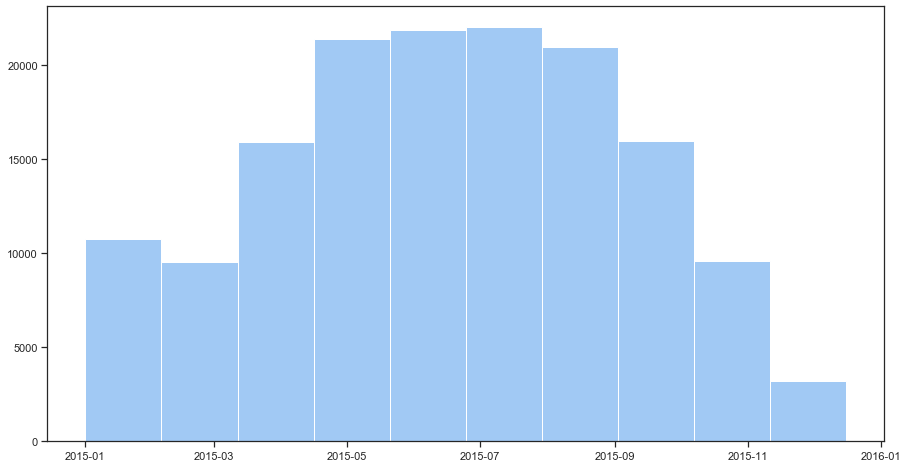

In [22]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

fig = plt.figure(figsize=(15,8))
fig = plt.hist(X3["purchase_time"])
plt.show()

In [23]:
#ax = sns.barplot(x="purchase time", y="purchase time", hue="y", data=X3)
#ax.legend(bbox_to_anchor=(1.1, 1.05))

No handles with labels found to put in legend.


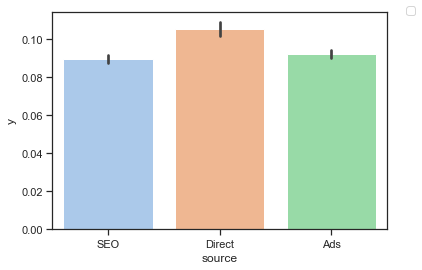

In [24]:
ax = sns.barplot(x="source", y="y", data=X3)
ax.legend(bbox_to_anchor=(1.1, 1.05))

No handles with labels found to put in legend.


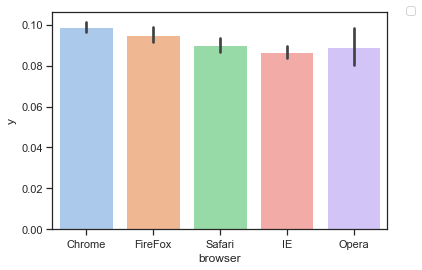

In [25]:
ax = sns.barplot(x="browser", y="y", data=X3)
ax.legend(bbox_to_anchor=(1.1, 1.05))

In [26]:
fraud_pv = df1[['purchase_value', 'y']].groupby(['purchase_value', 'y'], as_index = False).size().unstack().fillna(0)

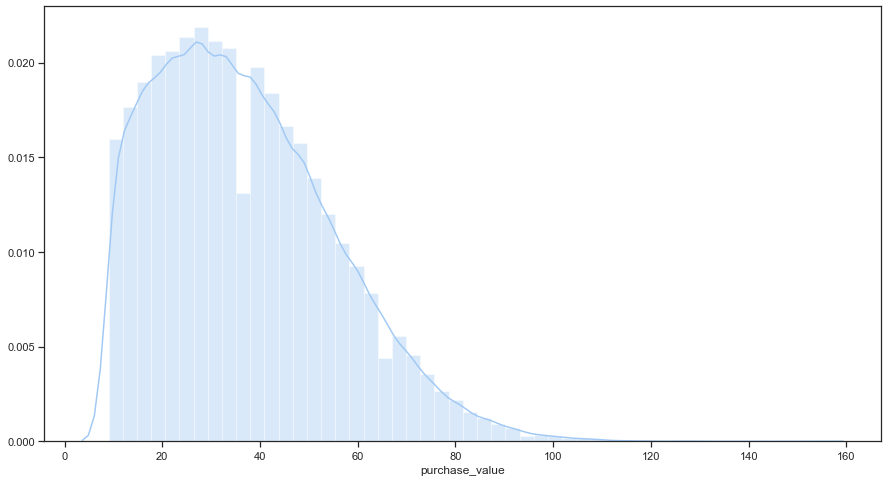

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sns.distplot(X3.purchase_value)

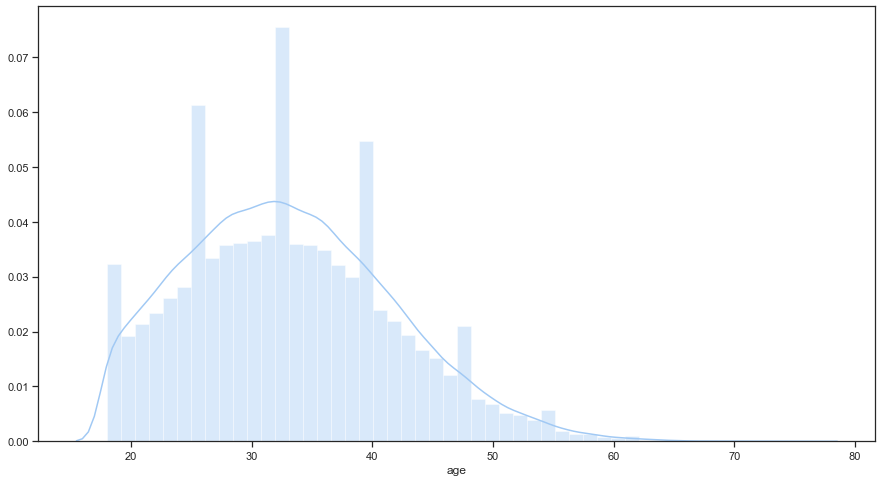

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sns.distplot(X3.age)

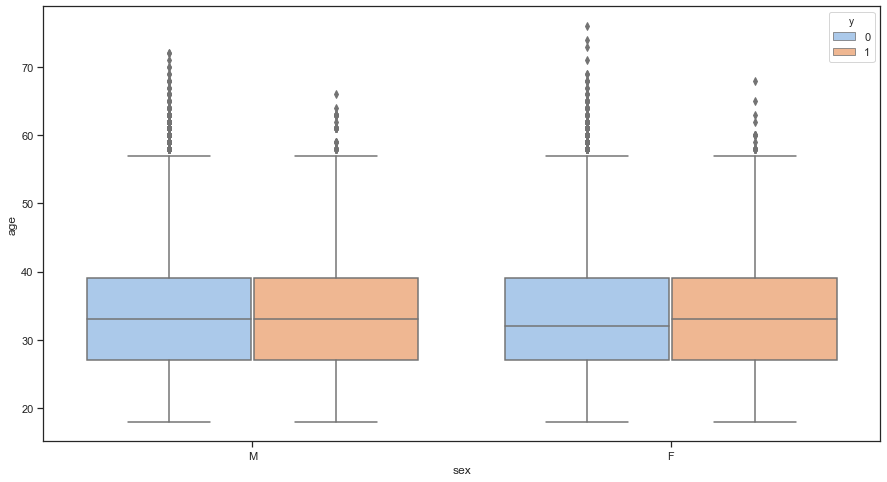

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sns.boxplot(x=X3.sex, y=X3.age, hue=X3.y)

# Preprocessing

In [30]:
X4 = X3.loc[:,["purchase_value", "source", "browser", "sex", "age", "time_delta", "%_Fraud_Country", "year", "month"]]
y4 = X3.loc[:, "y"]

## LabelEncoder pour variables catégorielles

In [31]:
X4_cat = pd.get_dummies(X4.loc[:,["source", "browser", "sex"]])
X4_num = X4.loc[:,["purchase_value", "age", "time_delta", "%_Fraud_Country",  "year", "month"]]

In [32]:
from sklearn.model_selection import train_test_split
X4_cat_train, X4_cat_test, X4_num_train, X4_num_test, y4_train, y4_test = train_test_split(X4_cat, X4_num, y4, stratify=y4, test_size=0.3, random_state = 42)

In [33]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

X4_num_train = pd.DataFrame(sc_x.fit_transform(X4_num_train), columns=X4_num_train.columns, index = X4_num_train.index)
X4_num_test = pd.DataFrame(sc_x.transform(X4_num_test),columns=X4_num_test.columns, index = X4_num_test.index)

X4_train = pd.merge(X4_cat_train, X4_num_train, left_index=True, right_index=True)
X4_test = pd.merge(X4_cat_test, X4_num_test, left_index=True, right_index=True)


In [34]:
X4_train.head()

,source_Ads,source_Direct,source_SEO,browser_Chrome,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_F,sex_M,purchase_value,age,time_delta,%_Fraud_Country,year,month
61243,0,0,1,0,1,0,0,0,0,1,0.715925,-0.017566,-0.660573,0.090096,0.0,0.370561
141795,0,0,1,0,1,0,0,0,0,1,0.934414,0.795170,-0.905383,1.721420,0.0,1.121774
84430,0,0,1,0,0,0,0,1,1,0,-1.414342,0.330749,-1.377888,-0.359768,0.0,-1.507472
115771,0,1,0,0,0,1,0,0,0,1,-0.267275,0.911276,0.960816,-0.986851,0.0,1.497380
62042,0,1,0,1,0,0,0,0,1,0,-0.158031,0.214644,-0.174742,0.090096,0.0,1.121774


## SVM

In [35]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X4_train, y4_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [36]:
classifier.score(X4_test, y4_test)

0.9496625049631623

In [37]:
y4_pred = classifier.predict(X4_test)
y4_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(classifier, param_grid, verbose=2, n_jobs=-1)
grid.best_params_


NameError: name 'svm' is not defined

In [39]:
best_model = grid.best_estimator_
print("Best model svm train score : ",best_model.score(X4_train, y4_train))
print("Best model svm test score : ",best_model.score(X4_test, y4_test))

NameError: name 'grid' is not defined

## Matrice de confusion - ROC - Chi2

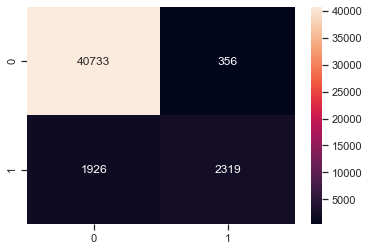

In [40]:
# Matrice du confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y4_test, y4_pred) 
sns.heatmap(cm, annot=True, fmt='d')

In [41]:
print("Le modèle de Naive Bayes prédit un taux de fraude de {} %".format(round((cm[1,0]+cm[1,1])/(cm[0,0]+cm[1,1]+cm[1,0]+cm[0,1])*100,2)))
print("Rappel: le taux de fraude actuel est de 9.4 %")

print("Le taux de faux négatifs est de {} %".format(round(cm[1,0]/(cm[0,0]+cm[1,1]+cm[1,0]+cm[0,1])*100,2)))
print("Le taux de faux positifs est de {} %".format(round(cm[0,1]/(cm[0,0]+cm[1,1]+cm[1,0]+cm[0,1])*100,2)))

Le modèle de Naive Bayes prédit un taux de fraude de 9.36 %
Rappel: le taux de fraude actuel est de 9.4 %
Le taux de faux négatifs est de 4.25 %
Le taux de faux positifs est de 0.79 %


In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc1 = roc_auc_score(y4_test, y4_pred)
fpr, tpr, thresholds = roc_curve(y4_test, classifier.predict_proba(X4_test_discrete)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc1)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

AttributeError: predict_proba is not available when  probability=False

In [43]:
######## X_cat/X_num avant normalisation #################
X4_cat2 = pd.get_dummies(X4.loc[:,["source", "browser", "sex"]], drop_first=True)
X5 = pd.merge(X4_cat2, X4_num, left_index=True, right_index=True)


from sklearn.feature_selection import chi2
feature_importance = chi2(X5, y4)

feature_ranking = pd.DataFrame(columns=X5.columns, data=feature_importance, index=["Chi2 Score", "P-value"]).transpose()
feature_ranking.sort_values("Chi2 Score", ascending=False)

,Chi2 Score,P-value
time_delta,1.991514e+10,0.000000e+00
month,1.712102e+04,0.000000e+00
%_Fraud_Country,4.487578e+02,1.344199e-99
source_Direct,4.958058e+01,1.903890e-12
browser_IE,2.042492e+01,6.201705e-06
age,1.485610e+01,1.160322e-04
source_SEO,1.358172e+01,2.283994e-04
sex_M,3.665302e+00,5.555658e-02
browser_Safari,3.447699e+00,6.333989e-02
purchase_value,1.404002e+00,2.360546e-01
